In [1]:
# the dataset we are going to use is from TorchVision
# We are going to demonstrate how to transform the images for consumption of the model, and how to feed batches of data to the model using DataLoader

%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from random import shuffle

c:\Users\金佳绒\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Here we specify two inputs for our input:
# transforms.ToTensor() converts images loaded by Pillow into PyTorch tensors
# transforms.Normalize() adjusts the value of the tensor so that their average is 0 and their standard deviation is 0.5
# Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [3]:
# create an instance of CIFAR10 dataset
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle= False)


classes = ('plane', 'cat', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


  dog   cat   cat   cat


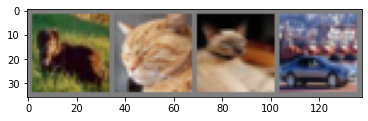

In [4]:
# Run the check on the output from dataloader
def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print labels
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
# the model
# This is a variant of LeNet, adapted for 3-color immage

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
# The last ingredients we need are a loss function and an optimizer
# cross entropy loss is a typical loss function for classification models like this one
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [10]:
# the training loop
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward & backward & optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statstics
        running_loss += loss.item()
        if i % 2000 == 1999: #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

    print('Finished training')

[1,  2000] loss: 2.191
[1,  4000] loss: 1.869
[1,  6000] loss: 1.683
[1,  8000] loss: 1.578
[1, 10000] loss: 1.520
[1, 12000] loss: 1.473
Finished training
[2,  2000] loss: 1.401
[2,  4000] loss: 1.387
[2,  6000] loss: 1.353
[2,  8000] loss: 1.336
[2, 10000] loss: 1.286
[2, 12000] loss: 1.299
Finished training
